In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import rcParams
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [2]:
class KNN:
    '''
    A class which implement k Nearest Neighbors algorithm from scratch.
    '''
def __init__(self, k=3):
    self.k = k
    self.X_train = None
    self.y_train = None

    
@staticmethod
def _euclidean_distance(p, q):
    '''
    Private method, calculates euclidean distance between two vectors.
    :param p: np.array, first vector
    :param q: np.array, second vector
    :return: float, distance
    '''
    return np.sqrt(np.sum((p - q) ** 2))  

def fit(self, X, y):
    '''
    Trains the model.
    No training is required for KNN, so `fit(X, y)` saves both parameteres
    to the constructor.
    :param X: pd.DataFrame, features
    :param y: pd.Series, target
    :return: None
    '''
    self.X_train = X
    self.y_train = y
    
def predict(self, X):
    '''
    Predicts the class labels based on nearest neighbors.
    :param X: pd.DataFrame, features
    :return: np.array, predicted class labels
    '''
    predictions = []
    for p in X:
        euc_distances = [self._euclidean_distance(p, q) for q in self.X_train]
        sorted_k = np.argsort(euc_distances)[:self.k]
        k_nearest = [self.y_train[y] for y in sorted_k]
        predictions.append(stats.mode(k_nearest)[0][0])
    return np.array(predictions)    

In [3]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [22]:
preds

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [17]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.956140350877193

In [26]:
evals = []
for k in range(1, 16, 2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    evals.append({'k': k, 'accuracy': accuracy})


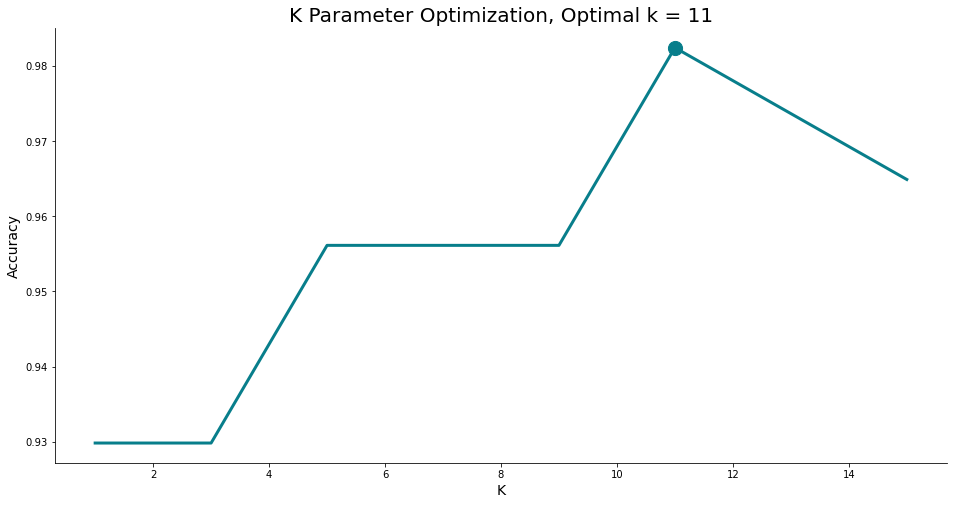

In [28]:
evals = pd.DataFrame(evals)
best_k = evals.sort_values(by='accuracy', ascending=False).iloc[0]

plt.figure(figsize=(16, 8))
plt.plot(evals['k'], evals['accuracy'], lw=3, c='#087E8B')
plt.scatter(best_k['k'], best_k['accuracy'], s=200, c='#087E8B')
plt.title(f"K Parameter Optimization, Optimal k = {int(best_k['k'])}", size=20)
plt.xlabel('K', size=14)
plt.ylabel('Accuracy', size=14)
plt.savefig('004_KNN_k_optimization.png', dpi=300, bbox_inches='tight')
plt.show()

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

In [30]:
accuracy_score(y_test, knn_preds)

0.956140350877193